In [1]:
import hepi
import smpl
import numpy as np
import hepi.madgraph as mg
import matplotlib.pyplot as plt
import hepi.resummino as rs
import time
mg.set_path("/opt/MG5_aMC_v2_7_0/")
print (mg.get_path())
rs.set_path("~/git/resummino_ug_to_UX_vNLO/")
print (rs.get_path())
ps = [(1000011,-1000011)]

/opt/MG5_aMC_v2_7_0/
~/git/resummino_ug_to_UX_vNLO/


# LO comparison

## Scale

Running: 16 jobs
skipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskip./output/0491b81f3a33da6d82e79cb128b1017afd68af1fd0f1fa3cba7f0e6ff408c204.out


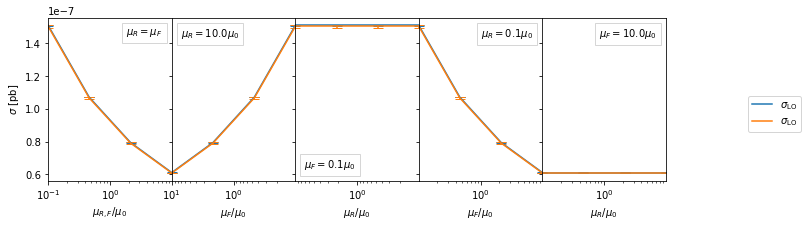

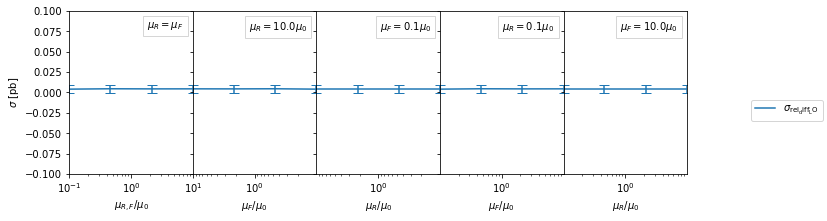

In [2]:
for pa,pb in ps:
    i = hepi.Input(hepi.Order.LO,13000,pa,pb,"param_card_nlo.dat","CT14lo","CT14lo",1., 1.,"NLO_COMP")
    li = [i]
    li = hepi.scan(li,"mu_f",np.around(np.logspace(-1, 1, 4),2))
    li = hepi.scan(li,"mu_r",np.around(np.logspace(-1, 1, 4),2))
    rs_dl = rs.run(li,False,False)
    mg_dl = mg.run(li,False,False)
    rs_dl['rel_diff_LO'] = (rs_dl["LO"]-mg_dl["LO"])/rs_dl["LO"]
    hepi.scale_plot(rs_dl,["LO"],cont=False)
    hepi.scale_plot(mg_dl,["LO"],cont=True)
    smpl.plot.show()
    hepi.scale_plot(rs_dl,["rel_diff_LO"],cont=False)
    plt.ylim([-0.1,0.1])
    smpl.plot.show()

## Mass

Running: 16 jobs
skipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskip./output/38a63bc772cae9e300538324e1db648de177d406e3320492c2833b04c1844aa0.out
computed AUC using sklearn.metrics.auc: 0.001952265661531226
computed AUC using sklearn.metrics.auc: 0.0019466431768724573


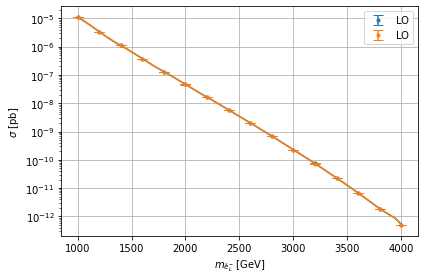

computed AUC using sklearn.metrics.auc: 13.719960482782628


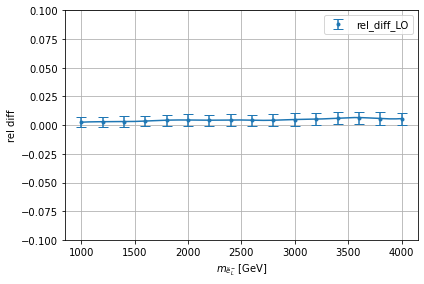

In [3]:
for pa,pb in ps:
    i = hepi.Input(hepi.Order.LO,13000,pa,pb,"param_card_nlo.dat","CT14lo","CT14lo",1., 1.,"NLO_COMP_MASS")
    li = [i]
    li = hepi.mass_scan([i],pa, np.linspace(1000,4000,16),diff_L_R=20)
    rs_dl = rs.run(li,False,False)
    mg_dl = mg.run(li,False,False)
    rs_dl['rel_diff_LO'] = (rs_dl["LO"]-mg_dl["LO"])/rs_dl["LO"]
    
    hepi.mass_plot(rs_dl,"LO",pa,logy=True)
    #hepi.mass_plot(rs_dl,p,"lo",logy=True)
    hepi.mass_plot(mg_dl,"LO",pa,logy=True)
    smpl.plot.show()
    hepi.mass_plot(rs_dl,"rel_diff_LO",pa,logy=False,label="rel_diff_LO",yaxis="rel diff")
    plt.ylim([-0.1,0.1])
    smpl.plot.show()

# NLO comparison

## Scale

Running: 16 jobs
skipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskip./output/a83bf15e68e4e07bc40ac53cf813736f5246efc0fecf4e74a4f3757a0c1027d8.out
No module named madgraph
INFO: ************************************************************
*                                                          *
*           W E L C O M E  to  M A D G R A P H 5           *
*                       a M C @ N L O                      *
*                                                          *
*                 *                       *                *
*                   *        * *        *                  *
*                     * * * * 5 * * * *                    *
*                   *        * *        *                  *
*                 *                       *                *
*                                                          *
*         VERSION 5.2.7.3               20xx-xx-xx         *
*                                                          *
*    The MadGraph

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device


ERROR: The width of particle 1000024 is too small for an s-channel resonance (3.07314162e-12). If you have this particle in an s-channel, this is likely to create numerical instabilities . 
ERROR: The width of particle 1000023 is too small for an s-channel resonance (6.67434232e-15). If you have this particle in an s-channel, this is likely to create numerical instabilities . 
INFO: Using LHAPDF v6.3.0 interface for PDFs 
INFO: Compiling source... 
INFO:           ...done, continuing with P* directories 
 Check the MG5_aMC option 'output_dependencies'.
 This will prevent the use of HERWIG6/Pythia6 shower. 
INFO: Compiling directories... 
INFO: Compiling on 16 cores 
INFO:  Compiling P0_uux_elmelp... 
INFO:  Compiling P0_ddx_elmelp... 
INFO:  Compiling P0_uxu_elmelp... 
INFO:  Compiling P0_dxd_elmelp... 
INFO:     P0_dxd_elmelp done. 
INFO:     P0_uux_elmelp done. 
INFO:     P0_uxu_elmelp done. 
INFO:     P0_ddx_elmelp done. 
INFO: Checking test output: 
INFO: P0_uux_elmelp 
INFO:  Resu

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: stty: 'standard input': Inappropriate ioctl for device
'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for devicestty: 'standard input': Inappropriate ioctl for device

stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'standard input': Inappropriate ioctl for device
stty: 'sta

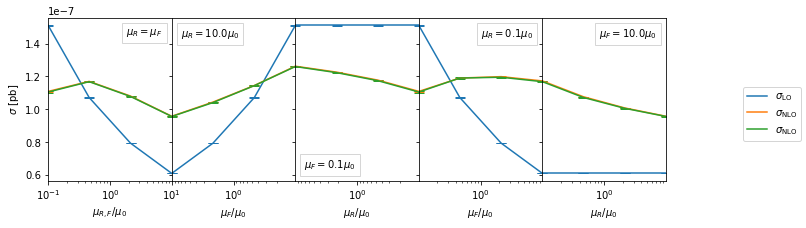

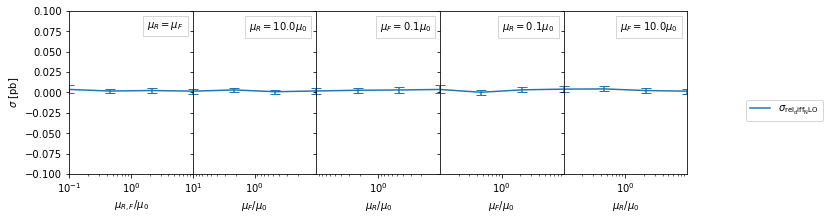

In [4]:
for pa,pb in ps:
    i = hepi.Input(hepi.Order.NLO,13000,pa,pb,"param_card_nlo.dat","CT14lo","CT14lo",1., 1.,"NLO_COMP")
    li = [i]
    li = hepi.scan(li,"mu_f",np.around(np.logspace(-1, 1, 4),2))
    li = hepi.scan(li,"mu_r",np.around(np.logspace(-1, 1, 4),2))
    rs_dl = rs.run(li,False,False)
    mg_dl = mg.run(li,True,False)
    rs_dl['rel_diff_NLO'] = (rs_dl["NLO"]-mg_dl["NLO"])/rs_dl["NLO"]
    hepi.scale_plot(rs_dl,["LO","NLO"],cont=False)
    hepi.scale_plot(mg_dl,["NLO"],cont=True)
    smpl.plot.show()
    hepi.scale_plot(rs_dl,["rel_diff_NLO"],cont=False)
    plt.ylim([-0.1,0.1])
    smpl.plot.show()

## Mass

Running: 16 jobs
skipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskipskip./output/bc26b45d520900d4af14567d3df8e918f80f298db5c665c6e3338ddd2c227e49.out
computed AUC using sklearn.metrics.auc: 0.001952265661531226
computed AUC using sklearn.metrics.auc: 0.00231188153856409
computed AUC using sklearn.metrics.auc: 0.002307955545336782


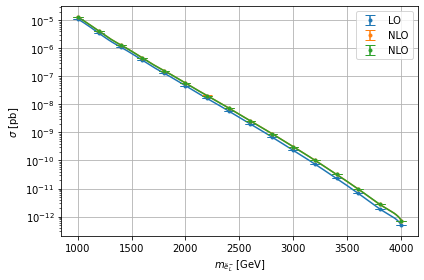

computed AUC using sklearn.metrics.auc: 7.487719886202699


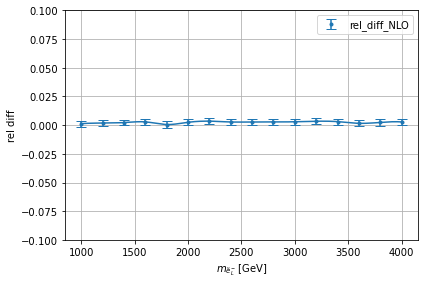

In [6]:
for pa,pb in ps:
    i = hepi.Input(hepi.Order.NLO,13000,pa,pb,"param_card_nlo.dat","CT14lo","CT14lo",1., 1.,"NLO_COMP_MASS")
    li = [i]
    li = hepi.mass_scan([i],pa, np.linspace(1000,4000,16),diff_L_R=20)
    rs_dl = rs.run(li,False,False)
    mg_dl = mg.run(li,False,False)
    rs_dl['rel_diff_NLO'] = (rs_dl["NLO"]-mg_dl["NLO"])/rs_dl["NLO"]
    
    hepi.mass_plot(rs_dl,"LO",pa,logy=True)
    hepi.mass_plot(rs_dl,"NLO",pa,logy=True)
    hepi.mass_plot(mg_dl,"NLO",pa,logy=True)
    smpl.plot.show()
    hepi.mass_plot(rs_dl,"rel_diff_NLO",pa,logy=False,label="rel_diff_NLO",yaxis="rel diff")
    plt.ylim([-0.1,0.1])
    smpl.plot.show()